# IS 4487 Assignment 18: Exploring APIs with yfinance

In this assignment, you will:
- Choose an industry you're interested in (such as tech, airlines, or retail)
- Use the `yfinance` Python package as an API to collect historical stock price data
- Clean and prepare the data for analysis
- Explore trends, volatility, and relationships between companies
- Summarize your findings and recommendation in a business memo

## Why This Matters

APIs (Application Programming Interfaces) allow businesses to pull live, real-world data from external sources directly into their analytics tools. Financial analysts, investment firms, and business leaders use APIs like `yfinance` to monitor company performance, assess market trends, and build models based on dynamic data.

This assignment helps you gain hands-on experience with one of the most common API workflows in business analytics: fetching, cleaning, analyzing, and interpreting financial data to support better decision-making.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_14_api.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



## Step 1: Choose an Industry and Find Company Ticker Symbols

Visit the following website to explore U.S. stock sectors and industries:  
https://www.tradingview.com/markets/stocks-usa/sectorandindustry-sector/

Choose one industry you are interested in (for example: Airlines, Technology, Fast Food, Retail, Energy, etc.).  
Write the names and ticker symbols of 4 public companies in that industry.

**Example:**
- Industry: Technology  
- Tickers: AAPL, MSFT


In [1]:
# Replace this list with your selected tickers
tickers = ['JPM', 'V', 'MA', 'BAC']

## Step 2: Use yfinance to Collect Historical Stock Data

Follow the steps below to use the `yfinance` API to collect historical stock price data.

### Instructions

1. Make sure the `yfinance` package is installed by running the code cell below.
2. Import any additional Python libraries that you might need to explore or visualize the data.
3. Use the `yf.download()` function to pull **5 years of daily adjusted close prices** for the companies you selected in Step 1.
    - Choose a start date and an end date that span the past 5 years (e.g., `"2020-01-01"` to `"2025-12-31"`).
    - Only select the **'High'** column, which represents the daily high
4. Preview the first few rows of the dataset using `.head()` to confirm that the data has loaded correctly.



In [2]:
# Import necessary libraries
!pip install yfinance

import yfinance as yf
import pandas as pd

In [8]:
# Download adjusted close prices
df = yf.download(tickers, start="2019-01-01", end="2024-01-01")['High']

/tmp/ipython-input-2971230702.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start="2019-01-01", end="2024-01-01")['High']
[*********************100%***********************]  4 of 4 completed


In [9]:
df.head()

Ticker,BAC,JPM,MA,V
Date,,,,
2019-01-02,21.215385,82.002995,183.477025,127.370884
2019-01-03,21.130999,81.931553,180.294393,125.028058
2019-01-04,21.645771,83.621708,183.890462,128.180462
2019-01-07,21.755481,84.069116,185.592370,130.637599
2019-01-08,21.763914,84.359096,185.402683,131.608929


## Step 3: Clean the Data

The data you pulled may contain missing values. Follow these steps:

1. Check the dataset for missing values using `.isnull().sum()`.
2. Fill any missing values using a forward fill method.
3. Recheck for missing values to confirm they have been handled.



In [11]:
# Check for missing values
print("Missing values before filling:\n", df.isnull().sum())

# Fill any missing values using a forward fill method
df.fillna(method='ffill', inplace=True)

# Recheck for missing values to confirm they have been handled
print("\nMissing values after filling:\n", df.isnull().sum())

Missing values before filling:
 Ticker
BAC    0
JPM    0
MA     0
V      0
dtype: int64

Missing values after filling:
 Ticker
BAC    0
JPM    0
MA     0
V      0
dtype: int64


/tmp/ipython-input-1388697376.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


## Step 4: Calculate Daily Returns

To better understand price movement, calculate the daily percentage change for each stock.

1. Use the `.pct_change()` method to calculate daily returns.
2. Drop any rows with missing values that may result from this calculation.
3. Preview the returns DataFrame to confirm it's correct.


In [12]:
# Calculate daily returns
daily_returns = df.pct_change()

# Drop any rows with missing values (first row after pct_change() will be NaN)
daily_returns.dropna(inplace=True)

# Preview the returns DataFrame
print("Daily Returns DataFrame Head:\n", daily_returns.head())

Daily Returns DataFrame Head:
 Ticker           BAC       JPM        MA         V
Date                                              
2019-01-03 -0.003978 -0.000871 -0.017346 -0.018394
2019-01-04  0.024361  0.020629  0.019946  0.025214
2019-01-07  0.005068  0.005350  0.009255  0.019169
2019-01-08  0.000388  0.003449 -0.001022  0.007435
2019-01-09  0.002326 -0.003241  0.021092  0.009335


## Step 5: Explore the Data Visually and Statistically

In this step, you will create visualizations and metrics to help understand stock behavior. Don’t interpret or explain anything here — just create the outputs so you can use them in your reflection later.

1. Create a line chart showing stock prices over the 5-year period.
2. Calculate the standard deviation of daily returns for each stock (volatility).
3. Create a correlation matrix of the daily returns between companies.




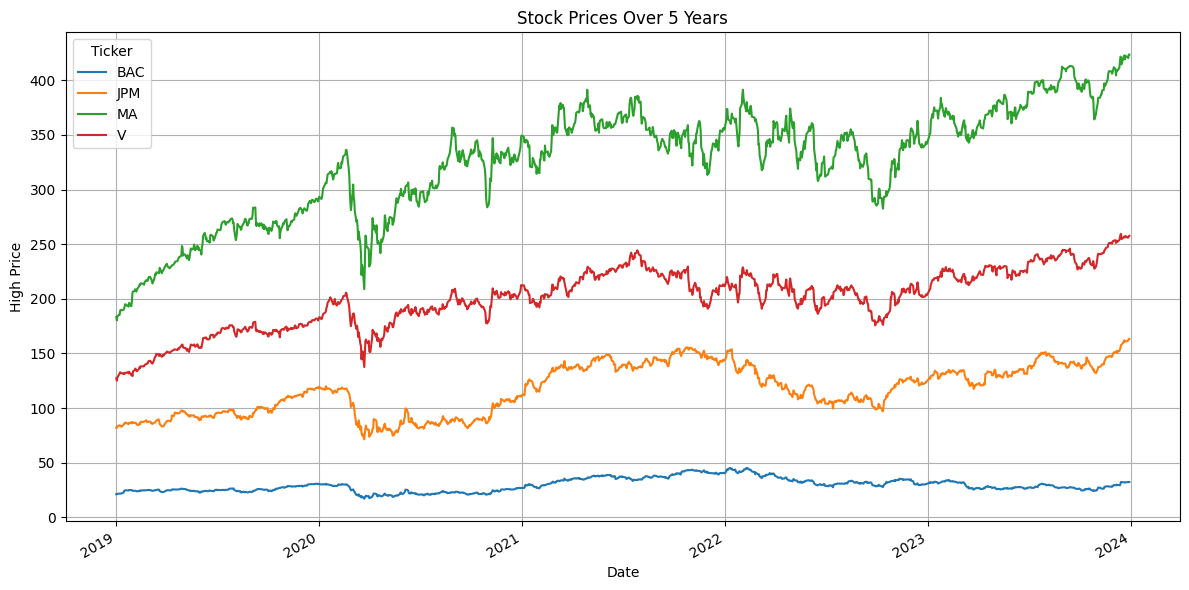


Daily Returns Volatility (Standard Deviation):
 Ticker
BAC    0.019749
JPM    0.017548
MA     0.016977
V      0.014739
dtype: float64

Correlation Matrix of Daily Returns:
 Ticker       BAC       JPM        MA         V
Ticker                                        
BAC     1.000000  0.880234  0.524161  0.532651
JPM     0.880234  1.000000  0.533622  0.539618
MA      0.524161  0.533622  1.000000  0.889714
V       0.532651  0.539618  0.889714  1.000000


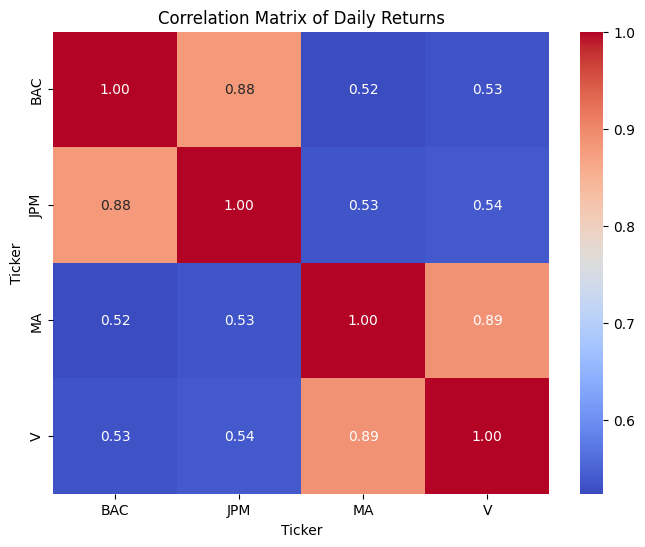

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create a line chart showing stock prices over the 5-year period.
plt.figure(figsize=(12, 6))
df.plot(ax=plt.gca())
plt.title('Stock Prices Over 5 Years')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Calculate the standard deviation of daily returns for each stock (volatility).
volatility = daily_returns.std()
print("\nDaily Returns Volatility (Standard Deviation):\n", volatility)

# 3. Create a correlation matrix of the daily returns between companies.
correlation_matrix = daily_returns.corr()
print("\nCorrelation Matrix of Daily Returns:\n", correlation_matrix)

# Optional: Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Daily Returns')
plt.show()

## Step 6: Write a Stakeholder Recommendation Memo

Now that you’ve completed your analysis, it’s time to turn your work into a clear, professional memo for a business audience.

### Scenario

You’ve been asked by a stakeholder (an investor, executive, or client) to evaluate whether it's a good time to invest in a particular industry. They’ve asked you to use recent stock performance data from several leading companies in that industry to help guide their decision.

### Your Task

Use the results from your code in Steps 2–5 to write a **multi-paragraph business memo** that:

1. **Introduces the industry you analyzed** and names the companies you included.
2. **Summarizes major trends** you observed in the stock prices over the last 5 years.
3. **Discusses key metrics**, such as volatility and correlations between companies.
4. **Presents your investment recommendation** — based on your evidence — and explains why you would or wouldn’t advise investing in this industry now.
5. **Suggests future analytics or data sources** that could strengthen or update your recommendation going forward.

This final section should show that you understand how real-world decisions evolve. Think about:
- What **additional data** might help (e.g., earnings reports, economic indicators, sentiment analysis)?
- What **types of models** could be applied (e.g., forecasting, classification, risk modeling)?
- How often should the analysis be updated?

### Format & Expectations

- Write **2–4 paragraphs** in business memo format (not bullet points).
- Use **specific, data-driven evidence** from your own analysis.
- Keep your writing professional and clear — imagine your reader is a client or executive, not a data analyst.
- Your memo should be written **entirely in your own words**. Do not copy from examples, online sources, or AI tools. Your writing should reflect your understanding and your interpretation of the results.
- You do not need to include charts in the memo — the code cells above already display them.



### Add memo here:

## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [ ]:
!jupyter nbconvert --to html "assignment_14_LastnameFirstname.ipynb"